<a href="https://colab.research.google.com/github/uditsevak/Udit_GDG_Tasks/blob/Task2/Udit_GDG_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**GDG TASK 2**

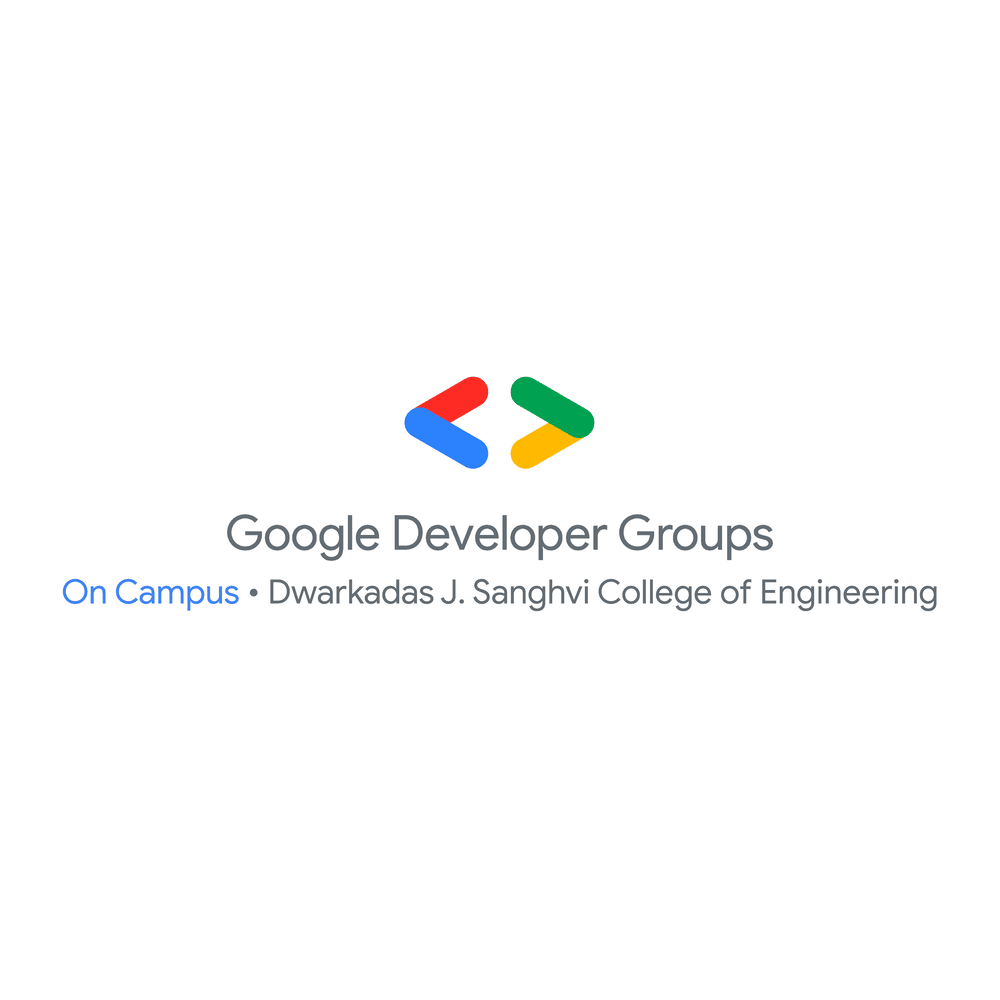

Last week, we dealt with the visualization and analytical aspect of ML. This week, lets directly get our hands dirty with various ML models.

Possibly the first question one must ask is, what is Machine Learning essentially made up of? In a broad sense, ML problems can be split into Supervised and Unsupervised learning. In supervised learning are the categories of Classification and Regression, which is what we'll explore today.

Like last time, resources and comments are provided above each cell, so peruse the resources and then get coding.

Supervised vs Unsupervised vs Reinforcement Learning:

https://www.simplilearn.com/tutorials/machine-learning-tutorial/types-of-machine-learning

Regression vs Classification :

https://www.analyticsvidhya.com/blog/2023/05/regression-vs-classification/ (Might be a little wordy)

https://www.youtube.com/watch?v=1NBwM5tavTk&ab_channel=IntuitiveML
(A very quick video)

Machine Learning for Everyone (Read till 1.1):

https://vas3k.com/blog/machine_learning/

OPTIONAL BUT USEFUL <br>
Overfitting and Underfitting [VERY IMPORTANT]
https://www.youtube.com/watch?v=T9NtOa-IITo

Lets import all the basic libraries.

In [ ]:
!pip install shap -q  #Will be used later on

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Mount your Google Drive using the cell below.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Regression

For regression, lets reuse the crab dataset that you worked on last week. Import the dataset from wherever you had saved it in the cell below.
Also print the first 5 rows to ensure you have loaded the dataset correctly.

In [ ]:
df_crab = pd.read_csv('Task1.csv')


In [ ]:
df_crab.shape

(74051, 10)

Now, let's some employ some Feature Engineering tactics which you would have performed in the previous tasks.

Create a function called crab_processing which takes a dataframe as an input, performs the following tasks, and returns a cleaned and edited df:

1) Drop the 'id' column.

2) Drop all rows where 'Height' of the crab is 0.

3) Create a new column called 'LostWeight' which is calculated using the following formula - ```
Weight - (Shucked + Viscera + Shell)``` .
If this formula gives a number less than 0, then assign 0 to the LostWeight column, else assign 1.

4) Finally, use one hot encoding to encode the column 'Sex'

Take help from your previous task where you have implemented these steps in different cells.


In [ ]:
# Your code starts here
def crab_processing(df):
  df.drop('id', axis=1, inplace=True)
  df = df[df['Height'] != 0]
  df.insert(8, 'Lost Weight', 0)
  df['Lost Weight'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])
  df = pd.get_dummies(df, columns=['Sex'])
  return df

df_crab = crab_processing(df_crab)
df_crab.head()

<ipython-input-6-3e7dab4b6ed5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Lost Weight'] = df['Weight'] - (df['Shucked Weight'] + df['Viscera Weight'] + df['Shell Weight'])


,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Age,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.247378,9,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.170097,8,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1.219029,9,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,4.316891,11,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.850485,8,False,True,False


If all is correct, this should be the shape of your df now.

In [ ]:
df_crab.shape

(74027, 12)

###Basic Visualization

In this problem, our aim is to predict the age of the crab, hence 'Age' here is called our target variable. To check its distribution, plot a histogram of the 'Age' column.

Choose the number of bins by experimenting. The output is expected to mimic a bell curve.

What is a histogram? - https://www.w3schools.com/python/matplotlib_histograms.asp

Difference between histogram and a bar graph - https://keydifferences.com/difference-between-histogram-and-bar-graph.html

<Axes: xlabel='Age', ylabel='Count'>

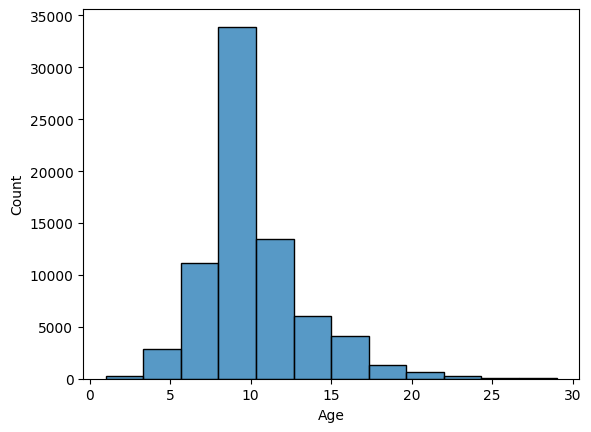

In [ ]:
# Your code starts here
sns.histplot(df_crab['Age'], bins=12)
# Your code ends here

###Feature and Variable Sets

As mentioned above, the 'Age' column is what we're gonna be predicting. So essentially we need to create two additional dataframes, one which contains all the training features (All columns except 'Age') and one which only contains the column 'Age'. Name them X and y respectively.

In [ ]:
# Your code starts here
X = df_crab.drop('Age', axis=1)
y = df_crab['Age']
# Your code ends here

In [ ]:
# This code should print (74027, 11) and (74027, 1) if everything is correct
X.shape, y.shape

((74027, 11), (74027,))

In [ ]:
#Print a few records of
X.head()

,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Lost Weight,Sex_F,Sex_I,Sex_M
0,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,1.247378,False,True,False
1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,0.170097,False,True,False
2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,1.219029,False,False,True
3,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,4.316891,True,False,False
4,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,0.850485,False,True,False


In [ ]:
#Print a few records of y
y.head()

,Age
0,9
1,8
2,9
3,11
4,8


###Train-Test Split

Implementation - https://www.youtube.com/watch?v=BUkqYGPnLZ8&ab_channel=ManifoldAILearning

Now, while we need data to train our regression model, it is equally important to keep some data aside for testing the effectiveness of the aforementioned model. Thus the dataset as a whole is generally further divided into the training dataset and the testing dataset.

In order to implement this, import train_test_split function from scikit-learn.

In [ ]:
# Import train_test_split Hint: Use sklearn.model_selection
from sklearn.model_selection import train_test_split

**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**

They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
# Your code ends here

Print the size and shape of each of the train/test splits (it should be in the ratio as per test_size parameter above, i.e in ratio of 0.3)

In [ ]:
# Your code starts here
X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Your code ends here

((51818, 11), (22209, 11), (51818,), (22209,))

Can you see that the data has been divided into 2 datasets of size 70% and 30% of the original dataset each? Use your calculator to confirm this :)
YES CONFIRMED USING CALCI


###Model fit and training

Here is the complete lowdown on SVM (Support Vector Machine):<br>
Theory : https://youtu.be/H9yACitf-KM <br>
Theory: https://www.analyticsvidhya.com/blog/2021/06/support-vector-machine-better-understanding/ <br>
Implementation : https://youtu.be/FB5EdxAGxQg

Import SVR (Support Vector Regressor) and its metrics from scikit-learn.

In [ ]:
# Add your import statement here
from sklearn.svm import SVR
# Create an SVR object 'svr' by calling SVR()
svr = SVR()


Fit the model on to the instantiated object itself using the X_train and y_train created earlier. No need to create another variable.

Hint: svr.fit()

This might take about a minute or so, just to inform you.

In [ ]:
# Your code starts here
model = svr.fit(X_train,y_train)
# Your code ends here

###Prediction, error estimate, and regression evaluation matrices

**Prediction using the svr model**

The X_train and y_train dataframes have been used to train the model. Now we will use X_test and y_test to evaluate the efficiency of the model we have trained.

Use svr.predict() on X_test and store it in a variable called "predictions". Print type and size of the predictions.

Size should be (22009,) if everything is correct.

In [ ]:
# Your code starts here
predictions = svr.predict(X_test)
print(predictions.shape)
print(predictions.dtype)
# Your code ends here

(22209,)
float64


Now that we have our predictions, let's compare it with y_test and see how accurate our predictions are.

Plot a Scatter plot of predicted price and y_test set to see if the data falls on a 45 degree straight line

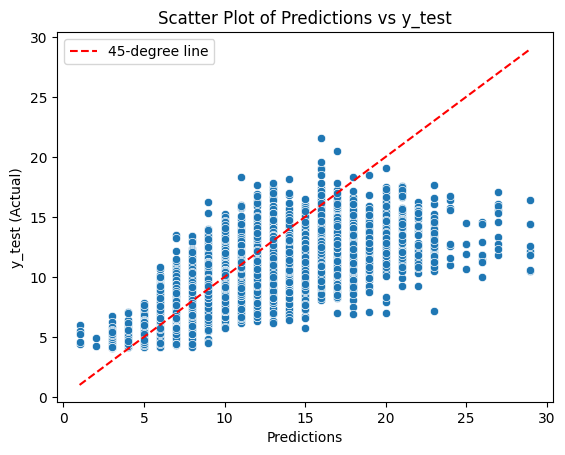

In [ ]:
# Your code starts here
sns.scatterplot(y=predictions, x=y_test)

# 45-degree line
xpoints = ypoints = np.linspace(min(predictions.min(), y_test.min()), max(predictions.max(), y_test.max()))
plt.plot(xpoints, ypoints, color='r', linestyle='--', label='45-degree line')

plt.xlabel('Predictions')
plt.ylabel('y_test')
plt.title('Scatter Plot of Predictions vs y_test')
plt.legend()
plt.show()
# Your code ends here

As you can see, it's not perfect, but you can definitely visualize the data lining up at a 45 degree angle.

**Model Evaluation**

We will be exploring the most common regression metric here namely R2 score. You can check out more metrics here: https://scikit-learn.org/stable/modules/classes.html#regression-metrics

Here's a video detailing all the popular regression metrics - https://www.youtube.com/watch?v=Ti7c-Hz7GSM

**Print the R-square value and round it to 3 decimal places**

Hint: sklearn metrics.r2_score

In [ ]:
# Your code starts here
from sklearn.metrics import r2_score
r2_score(y_test, predictions)
# Your code ends here

0.5554578570968286

In the cell below, explain what the above score means and also elaborate how 'good' is the score in terms of evaluation of the model

R2 score means that how good a regression model is as compared to a mean model. The formula would be 1-(ssr/ssm)
According to the score this is a average model for this dataset



In [ ]:
#Explore additional metrics here


You have succesfully implemented Support Vector Regressor to predict Age of a crab. But is this the only regression model out there? In the cell below, list down 3 more regression models with a basic explanation of how they work. Also include a line explaining in which scenario each model works best.

##Linear Regression
best used when there is a linear relationship between two variables

##Decision Tree
best used to handle non-linear data and mixed data

##Naive Bayes
used when we want to apply Bayes probability theorem into Linear Regression


1)The simplest regression model, which assumes a linear relationship between input variables and the target. It can be used for predicting a continuous dependent variable based on one or more independent variables.

2)A non-parametric approach that uses tree structures for making predictions, by partitioning the data into subsets based on feature values. Good for capturing complex, non-linear relationships.

3)Applies Bayes’ theorem to linear regression, allowing prior beliefs about the data to be incorporated. Useful for cases where uncertainty needs to be quantified in predictions.


##Explainability


So you passed some data into a model, and trained it using that data. You then used some other data to test the accuracy of that model, and it now predicts values when you pass in some data. Ok. But how does it REALLY predict that value? How much is it relying on each individual feature column of data that you passed to the model? This is where the concept of explainability comes into picture, where you can understand for each data point, exactly what parameters led the model to predict the value that it has.

Info about explainable AI <br>
https://www.ibm.com/topics/explainable-ai <br>
About shap <br>
https://shap.readthedocs.io/en/latest/example_notebooks/overviews/An%20introduction%20to%20explainable%20AI%20with%20Shapley%20values.html

In [ ]:
#Run this code as it is
from shap import KernelExplainer, force_plot, sample

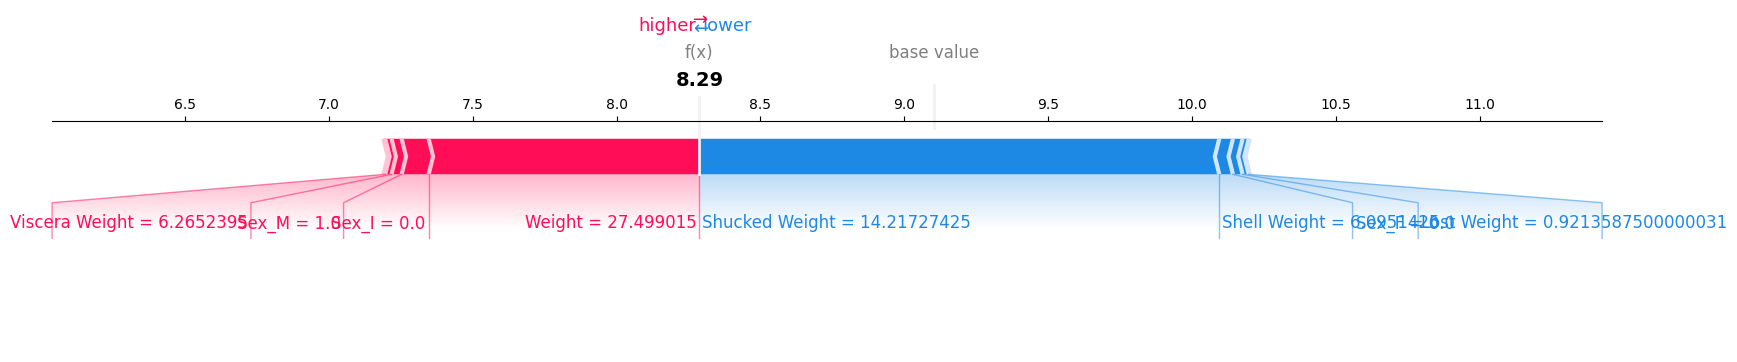

In [ ]:
#Run this code as it is
ex = KernelExplainer(svr.predict, sample(X_train, 10))  #only taking sample of 10 values for now
shap_values = ex.shap_values(X_test.iloc[0,:]) #explaining 1st tuple of the X_test dataframe
force_plot(ex.expected_value, shap_values, X_test.iloc[0,:], matplotlib=True)

Can you see how the above plot visualizes which parameters contributed significantly to the prediction, and what were the actual values which led to the prediction?

##Classification

In the below cells, we are going to implement K Nearest Neighbour Classification.

Link to the dataset is here - https://drive.google.com/file/d/1bVOfBJYUr0JtZ7pp1lcyNamnHHXn_fDm/view?usp=sharing <br>

Import the 'classified_data.txt' dataset using pandas and print the first five columns.

Use "index_col" parameter to index the dataframe according to the first column. Otherwise, a new column would get created. Call this new dataframe 'df'.

In [ ]:
df = pd.read_csv('classified_data.txt',index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


If you're wondering what these column names signify, well they are classified as the dataset name suggests. Our job here is to simply take the data at face value and build a model for classifying the target classes.

###Basic EDA

In the following two cells, use info() and describe() to get the data type and statistical summary of the dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB


In [ ]:
df.describe()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000


**Run a 'for' loop to draw boxplots of all the features for '0' and '1' TARGET CLASS**<br>
Hint: Loop through each of the 10 features and draw a separate boxplot. You should have 10 boxplots in total. <br>
Refer seaborn boxplot() documentation

Here is some information about boxplots:

Understanding Boxplots:
https://medium.com/analytics-vidhya/introduction-to-box-plots-and-how-to-interpret-them-22464acbcba7 <br>
Comparing two boxplots: https://www.nagwa.com/en/explainers/812192146073/

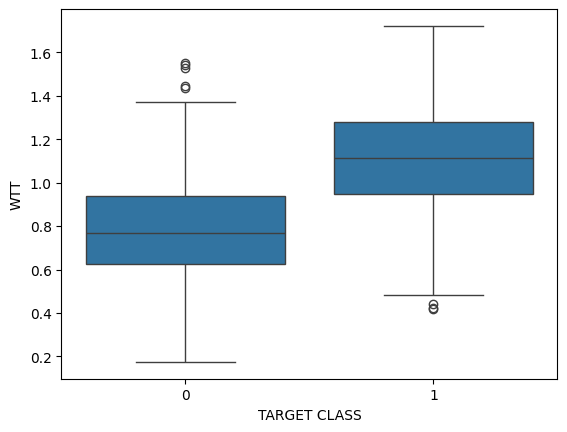

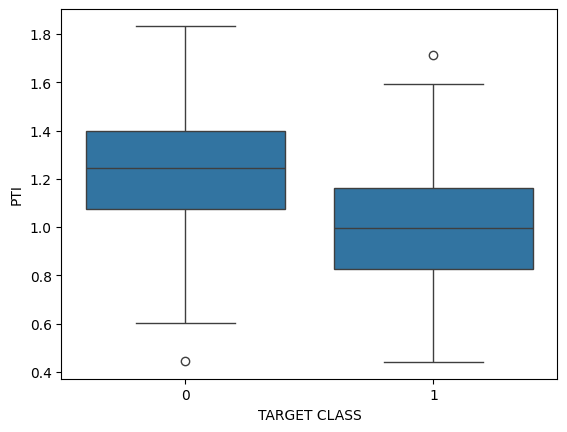

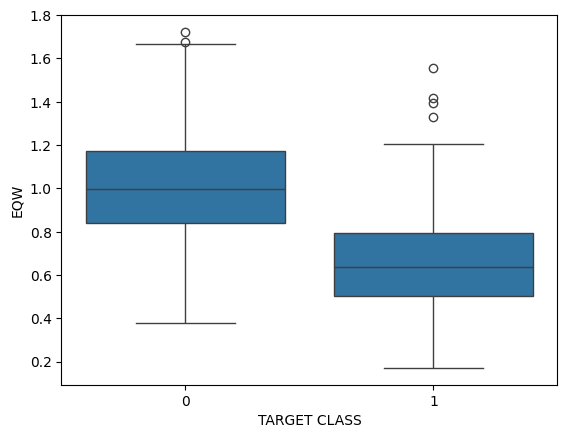

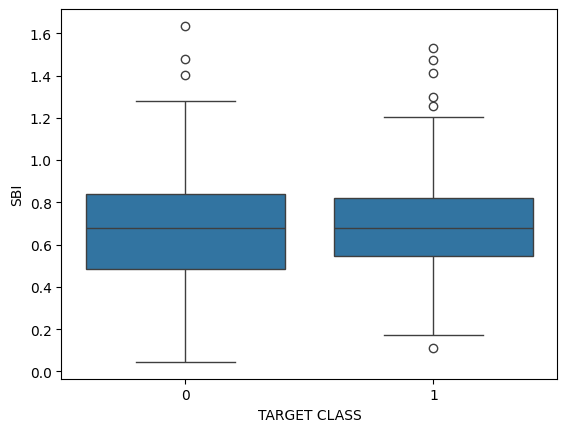

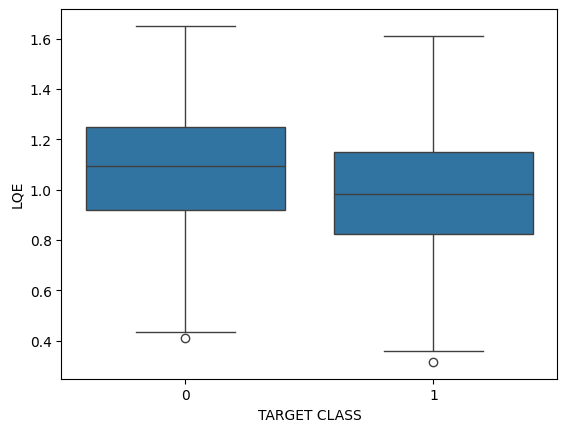

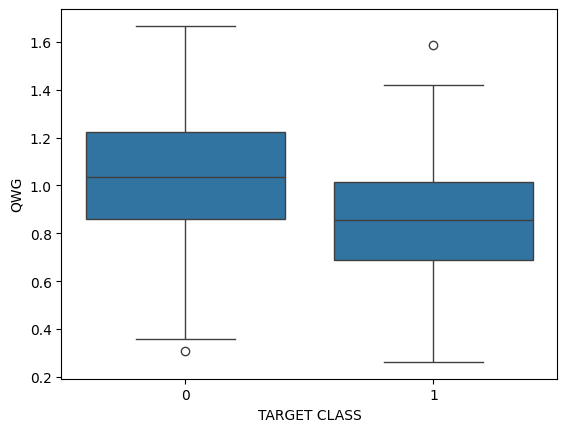

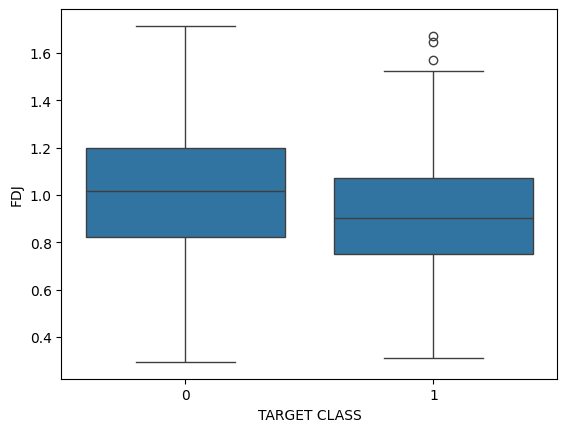

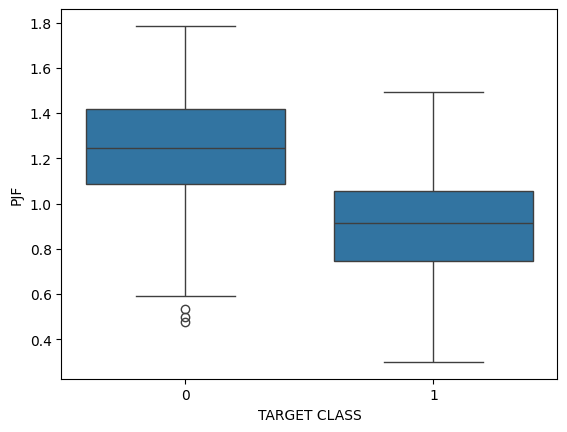

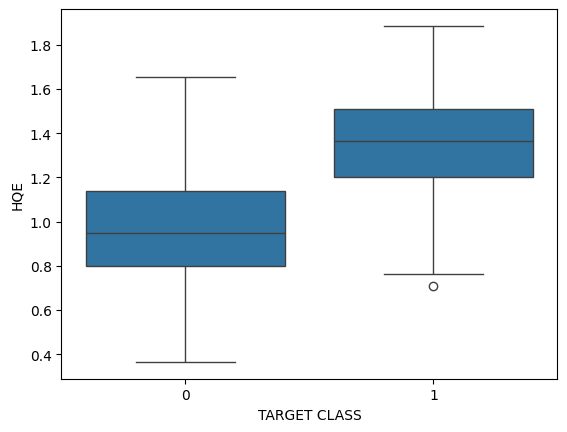

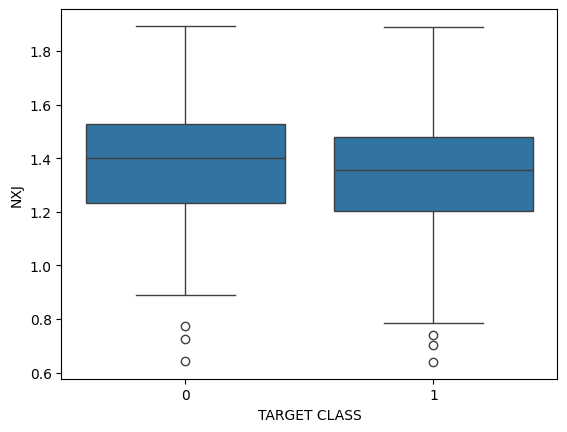

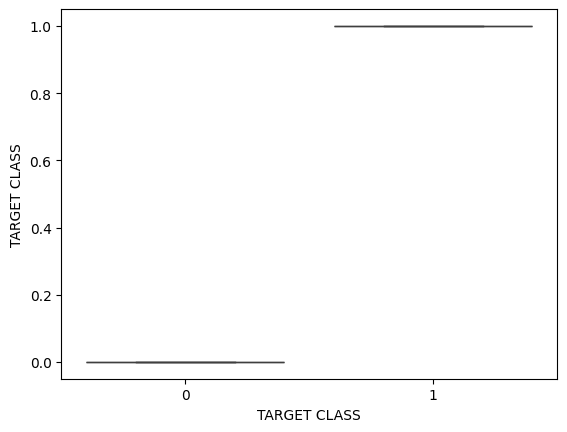

In [ ]:
# your code starts here
for cols in df.columns :
  sns.boxplot(x='TARGET CLASS', y=cols, data=df)
  plt.show()
# your code ends here

What conclusion, if any can you draw from these boxplots?
List them down below.

There are outliers present in some of the features.


Also the data is widespread

### Standardize the features using sklearn.preprocessing
Why should we standardize?<br>
Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardization is usually used prior to model fitting.<br><br>

To give you an example, values pertaining to Age usually lie within the range of 1-100, however values pertaining to Salary lie in a much wider range of say 10000-1000000. You can see how having both columns be a part of a classification model as is would lead to an imbalance in importance assigned to columns.
<br><br>
Go through this link for a better understanding:<br>
https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832

**import StandardScaler from Sklearn and instantiate it to a variable called "scaler"**

In [ ]:
# your code starts here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# your code ends here

**Fit only the features data to this scaler (leaving the TARGET CLASS column out) and then transform**<br>
Hint: scaler.fit() and scaler.transform()

In [ ]:
# your code starts here
columns = df.columns[:-1]
df[columns] = scaler.fit_transform(df[columns])
# your code ends here

**scaler.transform() will return an array. We need to convert this into a dataframe. Do this and add the column names to the dataframe. Call this new dataframe as "df_feat". Call head() on this df**<br>
Note: The final dataframe will have the initial columns except the "TARGET CLASS".

In [ ]:
# your code starts here
df_feat = pd.DataFrame(scaler.transform(df.drop('TARGET CLASS', axis=1)), columns=df.columns[:-1])
df_feat.head()
# your code ends here

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-3.707285,-3.613041,-5.996944,-1.579184,-8.491770,-12.703142,-6.911527,-8.843492,-7.179965,-9.827604
1,-7.027928,-6.011328,-6.380882,-0.247075,-6.071668,-8.188679,-8.209011,-4.411486,-10.171652,-3.556514
2,-6.004979,-3.016012,-1.827731,0.321411,4.107656,-7.084936,6.417482,-2.722136,-6.269766,-8.527091
3,0.114543,-0.210577,-4.994803,-0.247462,-2.381985,-4.729649,3.085550,-0.018938,0.282958,-11.707221
4,0.654923,-6.828756,-5.298226,-3.220814,-0.860903,-7.345166,-1.437858,-8.808813,-0.400144,-5.321377


### Train/Test split

**Set X to be equal to df_feat and set y accordingly. As you know, X contains our training features and y contains our target.**<br>
Hint: y can be taken directly from the initial dataframe "df"

In [ ]:
# Your code starts here.
X=df_feat
y=df['TARGET CLASS']

# Your code ends here

**Import train_test_split function from scikit-learn**<br>
**Create X and y train and test splits in one command using a test size of 0.3 and a random seed**<br>
They should be called X_train, X_test, y_train, y_test

In [ ]:
# Your code starts here.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
# Your code ends here

### Model fit and training

Before moving ahead with the cells below, learn how the K Nearest Neighbour Algorithm actually works.

Theory and implementation : https://youtu.be/wTF6vzS9fy4 <br>
Theory: https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

**import KNeighborsClassifier from sklearn and initialize it with neighbours = 1 (more on this later) . Fit this on X_train and y_train**

In [ ]:
# Your code starts here.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
# Your code ends here

KNeighborsClassifier(n_neighbors=1)

**Using this fitted model, predict on X_test. Store these predictions in variable called pred.**

In [ ]:
# Your code starts here.
pred = knn.predict(X_test)
# Your code ends here

**Let us check how correct these predictions are.<br>
Print a classification report of y_test and pred**<br>
Hint: sklearn classification_report

In [ ]:
# Your code starts here.
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))
# Your code ends here

              precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



Learn all about classification metrics - https://medium.com/analytics-vidhya/evaluation-metrics-for-classification-models-e2f0d8009d69

**Print the accuracy using numpy and round it to 3 decimal places.**

In [ ]:
# Your code starts here.
from sklearn.metrics import accuracy_score
np.round(accuracy_score(y_test,pred),3)
# Your code ends here

0.937

Hey, not bad! But can we further improve this? Remember our arbitrary choice for n_neighbours? Can we improve that?

### Choosing optimal 'k'

**Above, we chose n_neighbours to be equal to 1. Choosing a small value of K leads to unstable decision boundaries. <br>
We need to select n_neighbours by calculating the accuracy for every value of n from 1 to 60 and then choosing the one which gives the highest accuracy.**

In [ ]:
# Do the same as we did above, but this time make a loop from n = 1 to n = 60 and append the accuracy
# for each in a list

# Your code starts here.
acc=[]
for k in range(1,60):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  pred = knn.predict(X_test)
  acc.append(np.round(accuracy_score(y_test,pred),3))
# Your code ends here

**Plot a graph of K value vs Accuracy**

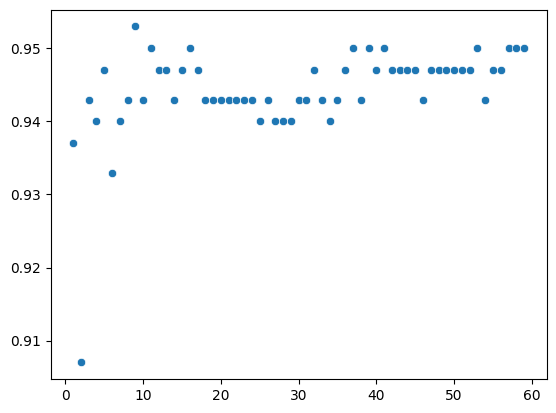

In [ ]:
# Your code starts here.
sns.scatterplot(x=range(1,60),y=acc)
plt.show()
# Your code ends here

**Choose the best value of n_neighbours and give a reason why and also print the accuracy**

In [ ]:
# Your code starts here.
n_acc_best = max(acc)
n_neigh_best = acc.index(n_acc_best)+1
print("Best value of n_neighbours:",n_neigh_best)
print("Corresponding highest accuracy:",n_acc_best)
# Your code ends here

Best value of n_neighbours: 9
Corresponding highest accuracy: 0.953


In [ ]:
# Reasons:


# **Compulsory:**

Task 1 : You have to research and create a short blog on the topic of **Reinforcement Learning**.


Task 2 : You have to research and create a short blog on the topic of **Oversampling and Undersampling**.
Happy coding! :)

##Task1 :
###Reinforcement Learning: Learning by Doing, Rewarded by Results

Imagine you're a kid trying to figure out how to ride a bike. You wobble, maybe fall a couple of times, but each time you get back up, you're learning—adjusting your balance, timing, and movements. Eventually, you master it, and the joy of riding is your reward. Reinforcement Learning (RL) is like that process but for machines: it’s about teaching them to make decisions, learn from mistakes, and improve through a system of rewards.

####So, What Is Reinforcement Learning, Exactly?
At its core, RL is a branch of machine learning focused on training agents to make sequences of decisions in an environment. Here’s how it works: an RL “agent” (think of it like the decision-maker) interacts with its environment (a simulation, game, or even real-world problem), tries actions, and learns from the outcomes. For every action, it gets feedback in the form of a “reward” (points, a score, or positive/negative feedback). Over time, the agent aims to maximize rewards by finding the best possible actions.

####Why It’s So Powerful
This learning method is revolutionary because it's not just following a set of rules. The agent learns and adapts, getting better with experience—much like how humans learn. This approach powers some exciting applications, from self-driving cars and robotic hands to game strategies and financial trading.

In games, for instance, RL agents play millions of simulated rounds to understand all possible scenarios and master the game. Google’s DeepMind famously used RL to create AlphaGo, the program that defeated the world champion in Go, an ancient strategy game.

####Key Ingredients of RL
Think of RL as having three main parts:

Agent: The learner or decision-maker.
Environment: The world in which the agent operates.
Rewards: Points given for correct actions, pushing the agent to improve over time.
The agent tries different actions and learns based on the results. If it gets a positive reward, it repeats that action. If it gets a negative reward, it tries something different. It’s a loop of trial, error, and adaptation.

Cool Applications of RL
RL is becoming essential in fields where complex decision-making is key. Here’s how it’s changing industries:

Healthcare: Helping to optimize treatments and drug discovery.
Finance: Designing trading algorithms that adapt to markets in real-time.
Robotics: Teaching robots to navigate, pick up objects, and handle real-world challenges.
Gaming: Mastering complex games, pushing AI boundaries in virtual worlds.
The Takeaway
Reinforcement Learning isn’t just a trend; it’s a leap toward autonomous learning systems that get better the more they interact with their world. It’s about trial, error, and finally, mastery—just like riding that bike.

##Task 2:
###Oversampling & Undersampling: Making Imbalanced Data Work for You

Picture this: you're organizing a debate, and you’ve got 95 people supporting one side and only 5 on the other. To keep it fair, you’ll want to balance the teams so both viewpoints get heard. This is exactly the issue data scientists face with imbalanced datasets—only instead of debaters, it's data samples for machine learning models that need to be balanced out. That’s where oversampling and undersampling come in.

##Why Do We Need Oversampling and Undersampling?
In real-world data, it’s common to have classes that aren’t equal in size, like detecting rare diseases or fraud cases. If one category (say, “fraud”) has way fewer samples than the other (like “non-fraud”), a model trained on this data might simply ignore the minority class because it hardly affects the accuracy. Oversampling and undersampling help us fix this imbalance, giving each class a fair shot at influencing the model.

##So, What’s the Difference?
####Oversampling: Boosting the Minority
Here, we increase the samples of the minority class, making it more “visible” in the dataset. A popular technique for oversampling is SMOTE (Synthetic Minority Over-sampling Technique), which creates synthetic samples similar to the existing ones in the minority class. Imagine copying and tweaking the minority examples to level the playing field—this way, the model gets more experience with them.
####Undersampling: Reducing the Majority
This is the opposite approach. Instead of adding more to the minority class, we reduce the samples in the majority class. By carefully selecting a smaller, more representative subset of the majority class, we bring balance without introducing new data. It’s like downscaling a big group to match the smaller one so that neither side dominates.
##When to Use Each?
The choice often depends on the size and specifics of your dataset:

Oversampling is ideal when you have a lot of storage and computing power and need a robust dataset to train on.
Undersampling works well when you have a massive majority class, but keep in mind it can result in losing valuable data.
##Real-World Examples of Each
Imagine building a model to predict rare diseases. You’d likely go for oversampling to increase the limited data on diagnosed patients. But, if you’re dealing with customer feedback where complaints (minority) and praises (majority) are highly imbalanced, undersampling the praises can make the model focus more on the valuable feedback in complaints.

##Wrapping It Up
Oversampling and undersampling are essential tools for balancing datasets, and both have their place. Think of them as fine-tuning the scale to ensure that your machine learning model treats each class fairly, boosting accuracy and relevance in prediction tasks.

# **End of Task**


